### **EDA: análisis anivariante**

Este notebook implementa **el análisis univariante del EDA** sobre los tres datasets limpios del proyecto. El objetivo es comprender la distribución y características de cada variable de forma individual antes de pasar a los análisis bivariante y multivariante.

#### **Datasets de EDA**

1. Cost of Living: `cost-of-living-variables-agregadas.csv` 
2. Circleloop: `digital-nomad-index-cicleloop-clean.csv`
3. Movingto: `digital-nomad-index-movingto-clean.csv`

#### **Pasos a seguir**

1. **Importar librerías y cargar los tres datasets procedentes del ETL**.
2. **Análisis univariante Cost of Living**.
3. **Análisis univariante Circleloop**.
4. **Análisis univariante Movingto**.
5. **Conclusiones que podemos extraer**. 

### **1. Cargamos las librerías y los datasets limpios procedentes del ETL**

In [2]:
# Cargamos las librerías que vamos a necesitar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.copy_on_write = True

# Configuración de las visualizaciones del análisis univariante:
# 1. Estilos de Matplotlib y Seaborn
# 2. Paleta estándar viridis

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")


# Cargamos todos los datasets totalmente limpios del proceso de ETL

df_cost = pd.read_csv("./data/variables-agregadas-cost-of-living.csv")
df_circleloop = pd.read_csv("./data/digital-nomad-index-cicleloop-clean.csv")
df_movingto = pd.read_csv("./data/digital-nomad-index-movingto-clean.csv")

# Cargamos los datasets para saber si todo está correcto

df_cost.head(10) # Selección de variables originales y agregadas de Cost of Living

,city_name,country_name,meal_inexpensive_restaurant,meal_midrange_restaurant_2p,mcmeal_fastfood,beer_domestic_restaurant_0_5l,beer_imported_restaurant_0_33l,cappuccino_restaurant,soda_restaurant_0_33l,water_restaurant_0_33l,...,avg_net_salary,mortgage_interest_rate_20y,data_quality_flag,continent,nomad_housing_cost,basic_basket_index,daily_meal_cost,monthly_nomad_cost,local_purchasing_power,housing_salary_ratio
0,Seoul,South Korea,7.68,53.78,6.15,3.07,4.99,3.93,1.48,0.79,...,2689.62,3.47,1,Asia,650.030,4.631667,11.61,1209.990,2.222845,24.168098
1,Shanghai,China,5.69,39.86,5.69,1.14,4.27,3.98,0.53,0.33,...,1419.87,5.03,1,Asia,830.905,1.995000,9.67,1147.345,1.237527,58.519794
2,Guangzhou,China,4.13,28.47,4.98,0.85,1.71,3.54,0.44,0.33,...,1211.68,5.19,1,Asia,425.365,1.572500,7.67,692.370,1.750047,35.105391
3,Mumbai,India,3.68,18.42,3.68,2.46,4.30,2.48,0.48,0.19,...,640.81,7.96,1,Asia,408.225,1.078333,6.16,590.785,1.084675,63.704530
4,Delhi,India,4.91,22.11,4.30,1.84,3.68,1.77,0.49,0.19,...,586.46,8.06,1,Asia,182.575,1.047500,6.68,391.890,1.496491,31.131705
5,Dhaka,Bangladesh,1.95,11.71,4.88,5.85,5.12,1.95,0.29,0.16,...,280.73,9.26,1,Asia,114.940,1.193333,3.90,286.730,0.979074,40.943255
6,Osaka,Japan,7.45,48.39,5.36,3.35,3.72,3.28,1.09,0.81,...,2322.46,1.49,1,Asia,525.550,3.302500,10.73,1035.305,2.243262,22.629023
7,Jakarta,Indonesia,2.59,22.69,3.57,2.06,3.24,2.23,0.61,0.27,...,509.12,9.05,1,Asia,391.510,1.765000,4.82,643.550,0.791112,76.899356
8,Shenzhen,China,4.27,28.47,4.98,1.14,3.99,4.20,0.47,0.34,...,1572.22,4.99,1,Asia,586.910,1.829167,8.47,890.265,1.766013,37.330017
9,Kinshasa,Congo,15.11,42.63,10.08,1.74,2.50,4.35,2.78,0.84,...,400.00,19.33,0,Africa,1362.500,4.215000,19.46,2664.840,0.150103,340.625000


In [3]:
df_circleloop.head(10) # Dataset de Nomad Index de Circleloop

,rank,country,broadband_speed_mbps,mobile_speed_mbps,broadband_cost,monthly_rent,happiness_index,migrant_population_pct,remote_jobs_searches,digital_nomad_score
0,1,Canada,149.35,84.54,43.77,1111.50,7.23,21.3,83900,74.35
1,2,UK,76.49,41.72,44.83,1084.59,7.17,14.1,68400,63.43
2,3,Romania,188.55,41.48,10.23,380.25,6.12,2.4,10980,62.28
3,4,Sweden,158.73,56.64,49.72,1035.45,7.35,20.0,3490,61.54
4,5,Denmark,179.81,66.68,60.55,1239.03,7.65,12.5,1080,61.49
5,6,France,177.93,50.45,34.91,886.86,6.66,12.8,5360,60.80
6,7,Netherlands,125.82,88.13,53.27,1419.21,7.45,13.4,3440,60.27
7,8,Australia,58.52,88.35,60.71,1343.16,7.22,30.0,17600,60.16
8,9,Switzerland,186.40,73.85,90.52,1807.65,7.56,29.9,3840,60.15
9,10,Germany,120.13,49.67,36.09,964.08,7.08,15.7,12720,60.00


In [4]:
df_movingto.head(10) # Dataset de Nomad Index de Circleloop

,rank,country,overall_score,internet_speed,cost_of_living,safety,visa_ease,quality_of_life,taxes,tax_free_period
0,1,Portugal,92,90,85,95,95,95,NHR 20%,10 years
1,2,Estonia,91,95,75,90,98,92,0-20%,183 days/year
2,3,Georgia,90,85,88,82,100,80,1%,183 days/year
3,4,Spain,89,88,80,92,92,94,24%,183 days/year
4,5,Thailand,88,85,95,80,90,88,0-35%,183 days/year
5,6,Mexico,87,82,90,75,94,86,1.92-35%,183 days/year
6,7,Czech Republic,86,87,78,88,85,90,15%,183 days/year
7,8,Malaysia,85,80,92,85,90,85,0-30%,182 days/year
8,9,Croatia,84,84,76,88,88,89,24%,1 year
9,10,Costa Rica,83,79,85,80,90,88,0-25%,183 days/year


### **2. Análisis univariante: Cost of Living**

#### **2.1 Variables categóricas**

Analizamos la distribución de ciudades por país y continente: 

1. Cost of Living es el dataset con mayor volumen de datos: 4.743 ciudades en total. 
2. Ver el volumen de ciudades por continente y por países nos sitúan a nivel general.   

Distribución de ciudades por continente:
----------------------------------------
continent
Europe           1730
North America    1338
Asia              961
Africa            311
South America     305
Oceania            97
Name: count, dtype: int64

Total: 4,742 ciudades


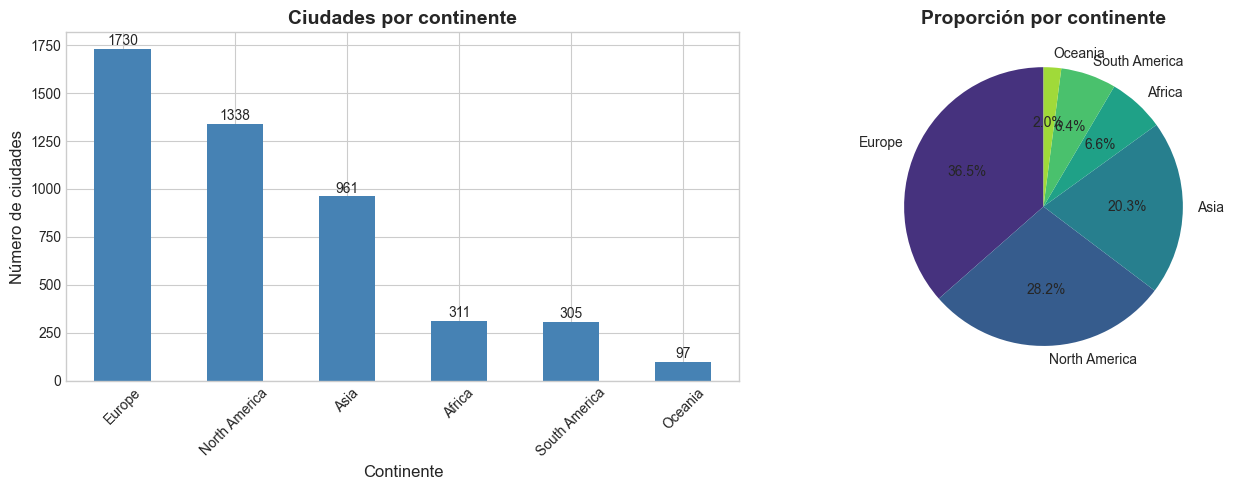

Top 10 de países con más ciudades:
----------------------------------
country_name
United States     1027
Italy              170
India              165
Brazil             157
United Kingdom     155
Germany            144
Russia             129
Canada             117
France              99
China               99
Name: count, dtype: int64


In [14]:
# Distribución por continente

print("Distribución de ciudades por continente:")
print("----------------------------------------")
continent_counts = df_cost['continent'].value_counts()
print(continent_counts)
print(f"\nTotal: {continent_counts.sum():,} ciudades")

# Montamos la matriz para los dos gráficos. En este caso: 
# 1. Gráfico de barras con número de ciudades por continente
# 2. Gráfico de tarta con el porcentaje de reparto de volumen de ciudades por continente

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Gráfico de barras con ciudades por continente

ax1 = axes[0]
continent_counts.plot(kind='bar', ax=ax1, color='steelblue')
ax1.set_title('Ciudades por continente', fontsize=14, fontweight='bold')
ax1.set_xlabel('Continente', fontsize=12)
ax1.set_ylabel('Número de ciudades', fontsize=12)
ax1.tick_params(axis='x', rotation=45)


for i, v in enumerate(continent_counts): # Añadimos valores sobre las barras
    ax1.text(i, v + 20, str(v), ha='center', fontsize=10)

# Gráfico de tarta con el porcentaje de reparto entre continente 

ax2 = axes[1]
continent_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90)
ax2.set_title('Proporción por continente', fontsize=14, fontweight='bold')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

# Resumen de volumen de ciudades por países

print("Top 10 de países con más ciudades:")
print("----------------------------------")
country_counts = df_cost['country_name'].value_counts().head(10)
print(country_counts)


#### **2.2 Variables numéricas originales del dataset Cost of Living**

1. Analizamos variables oroginales que son relevante para un nómada digital: vivienda, alimentación, transporte y salarios.
2. Mostramos distribuciones con histogramas y valores atípicos con diagramas de caja.  

In [28]:
# Creamos una lista de las variables originales principales de Cost of Living

vars_list = ['rent_1br_city_center', 'rent_1br_outside_center',
                'meal_inexpensive_restaurant', 'cappuccino_restaurant',
                'public_transport_monthly_pass', 'gasoline_1l',
                'avg_net_salary', 'utilities_85sqm',
                'internet_60mbps_unlimited']

# Pintamos los valores estadísticos descriptivos de cada una de las variables originales más relevantes: 
# Son relevantes dentro del plan de vida de un nómada digital: 
# 1. Alquiler de vivienda: 'rent_1br_city_center', 'rent_1br_outside_center'
# 2. Cesta de la compra: 'meal_inexpensive_restaurant', 'cappuccino_restaurant'
# 3. Ttransporte: 'public_transport_monthly_pass', 'gasoline_1l'
# 4. Salario y gastos: 'avg_net_salary', 'utilities_85sqm'
# 5. Conectividad a internet: 'internet_60mbps_unlimited'

print("Valores estadísticos descriptivos de las variables originales de Cost of Living:")
print("--------------------------------------------------------------------------------")
df_cost[vars_list].describe().round(2)

Valores estadísticos descriptivos de las variables originales de Cost of Living:
--------------------------------------------------------------------------------


,rent_1br_city_center,rent_1br_outside_center,meal_inexpensive_restaurant,cappuccino_restaurant,public_transport_monthly_pass,gasoline_1l,avg_net_salary,utilities_85sqm,internet_60mbps_unlimited
count,4742.00,4742.00,4742.00,4742.00,4742.00,4742.00,4742.00,4742.00,4742.00
mean,707.64,565.72,10.39,2.74,40.79,1.36,1870.48,135.04,143.33
std,620.69,505.84,7.02,1.35,31.45,0.49,1600.99,86.77,7056.95
min,21.70,12.20,0.45,0.22,0.00,0.03,18.00,6.07,1.36
25%,258.98,177.94,4.48,1.58,17.79,1.10,456.00,67.77,18.97
50%,526.87,410.96,10.00,2.62,36.88,1.26,1369.87,127.90,34.41
75%,1048.31,850.00,15.00,3.75,50.00,1.71,3075.00,182.40,57.85
max,12608.83,8989.37,57.14,10.00,369.86,3.70,12821.40,1066.67,485991.77


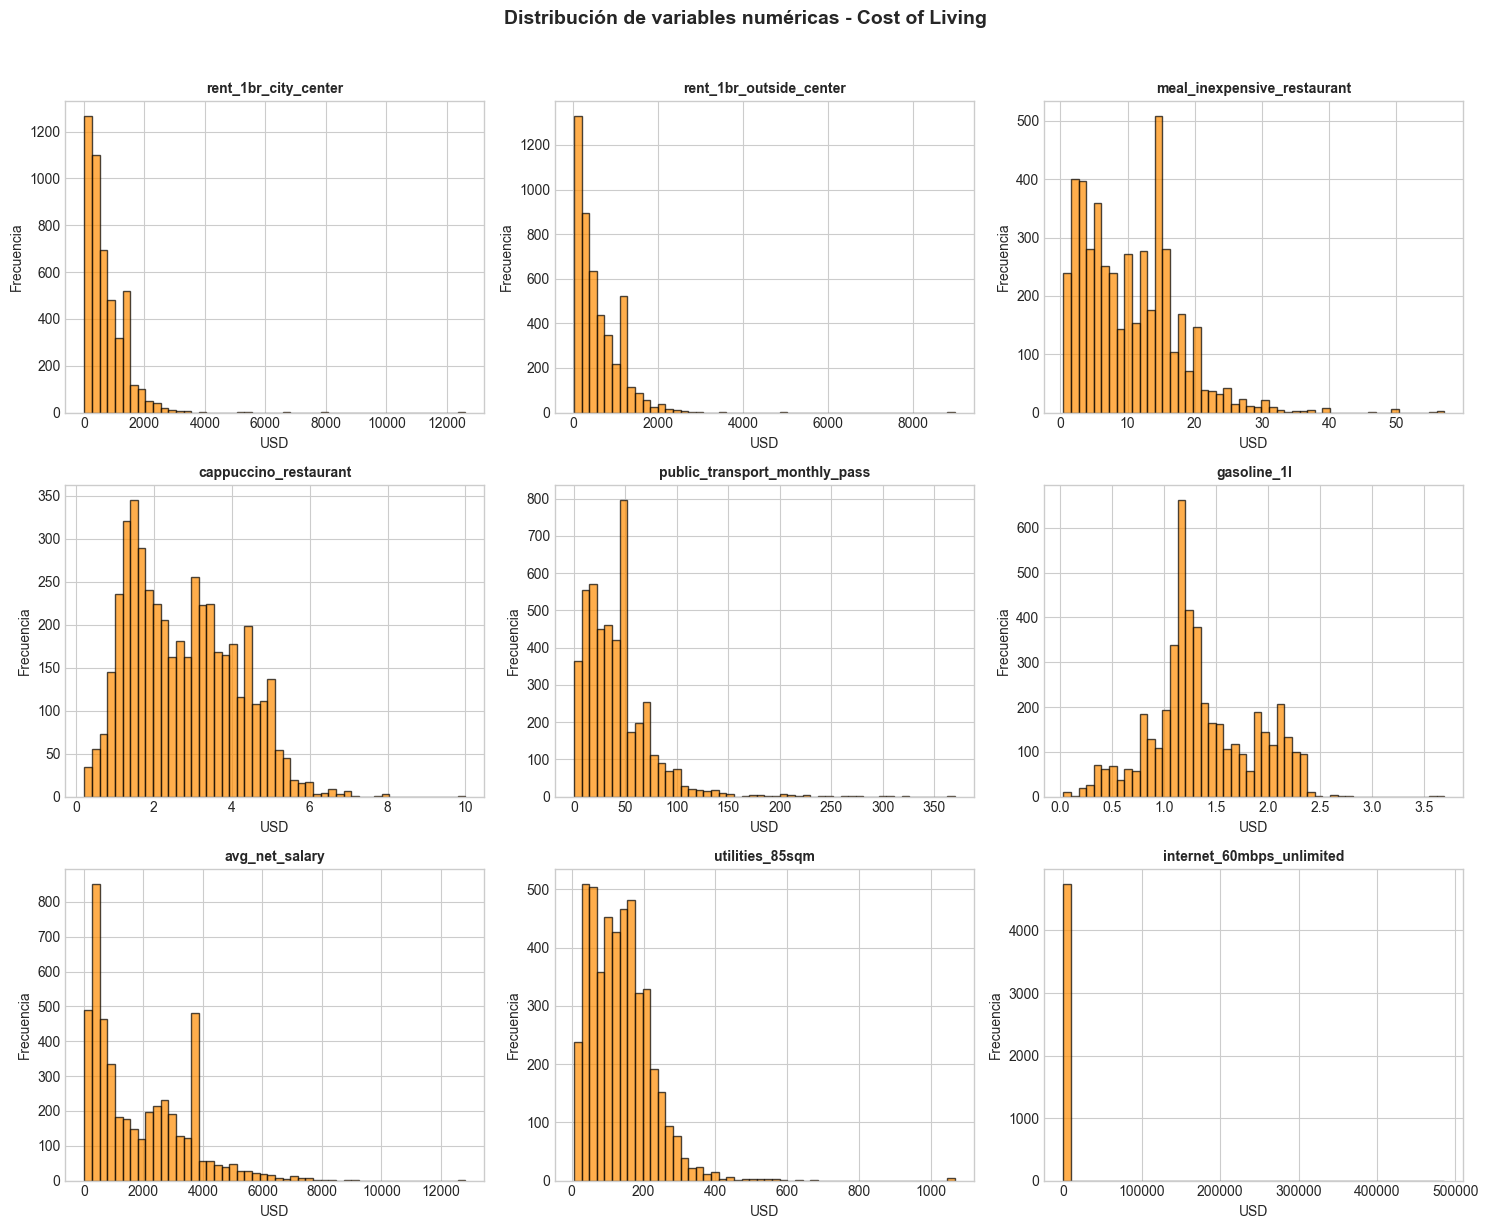

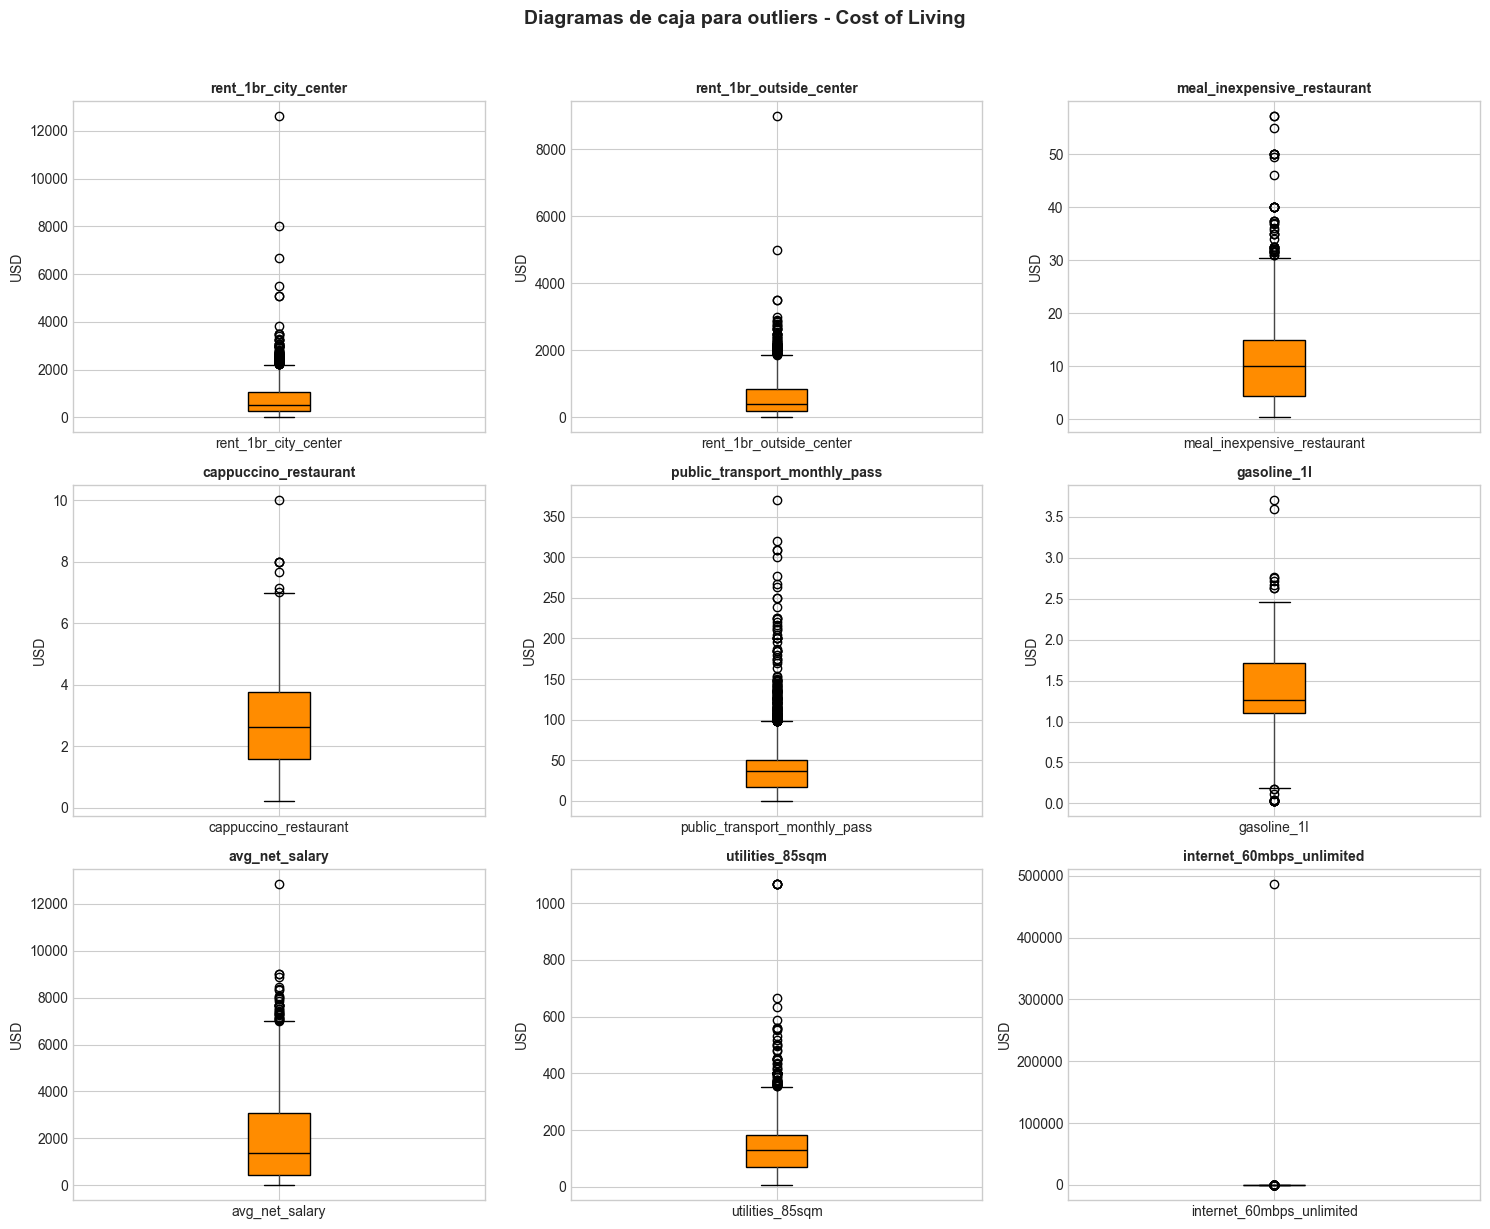

In [111]:
# Visualizaciones: distribuciones con histogramas y outliers con diagramas de caja

# Histogramas para ver la distribución de toda la lista de variables clave 

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, var in enumerate(vars_list):
    ax = axes[i]
    df_cost[var].hist(bins=50, ax=ax, color='darkorange', edgecolor='black', alpha=0.7)
    ax.set_title(var, fontsize=10, fontweight='bold')
    ax.set_xlabel('USD')
    ax.set_ylabel('Frecuencia')

plt.suptitle('Distribución de variables numéricas - Cost of Living', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Mostramos los diagramas de caja para ver outliers en las mismas variables 

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, var in enumerate(vars_list):
    ax = axes[i]
    df_cost.boxplot(column=var, ax=ax,
                    patch_artist=True, 
                    boxprops=dict(facecolor='darkorange', color='black'),
                    medianprops=dict(color='black'))
    ax.set_title(var, fontsize=10, fontweight='bold')
    ax.set_ylabel('USD')

plt.suptitle('Diagramas de caja para outliers - Cost of Living', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### **2.3 Análisis de variables agregadas de Cost of Living**

Hacemos lo mismo, pero esta vez con las variables agregadas de Cost of Living. 

- Analizamos variables agregadas que creamos porque combinaban variables para un análisis más preciso.
- Mostramos distribuciones con histogramas y valores atípicos con diagramas de caja.  
- Análisis porcentual de variables agregadas de Cost of Living: 
    1. Análisis por percentiles del coste medio mensual en todas las ciudades del dataset. 
    2. Capacidad de compra por encima de salario medio. 
    3. Volumen de inversión del salario medio en vivienda. 

In [ ]:
# Lista de variables agregadas de Cost of Living

added_vars_list = [
    'nomad_housing_cost',
    'basic_basket_index',
    'daily_meal_cost',
    'monthly_nomad_cost',
    'local_purchasing_power',
    'housing_salary_ratio'
    ]

# Valores estadísticos descriptivos de las variables agregadas

print("Valores estadísticos descriptivos de las variables agregadas de Cost of Living:")
print("-------------------------------------------------------------------------------")
df_cost[added_vars_list].describe().round(2)

Valores estadísticos descriptivos de las variables agregadas de Cost of Living:
-------------------------------------------------------------------------------


,nomad_housing_cost,basic_basket_index,daily_meal_cost,monthly_nomad_cost,local_purchasing_power,housing_salary_ratio
count,4742.00,4742.00,4742.00,4742.00,4742.00,4742.00
mean,636.68,2.35,13.14,1223.50,1.52,47.39
std,553.18,1.17,7.96,7094.61,0.75,75.85
min,18.98,0.49,1.10,108.08,0.00,2.94
25%,219.81,1.44,6.37,491.88,0.97,26.95
50%,471.72,2.08,12.26,967.96,1.46,34.68
75%,945.63,3.14,18.92,1642.79,1.94,49.12
max,10799.10,10.30,64.28,486948.09,7.94,2191.42


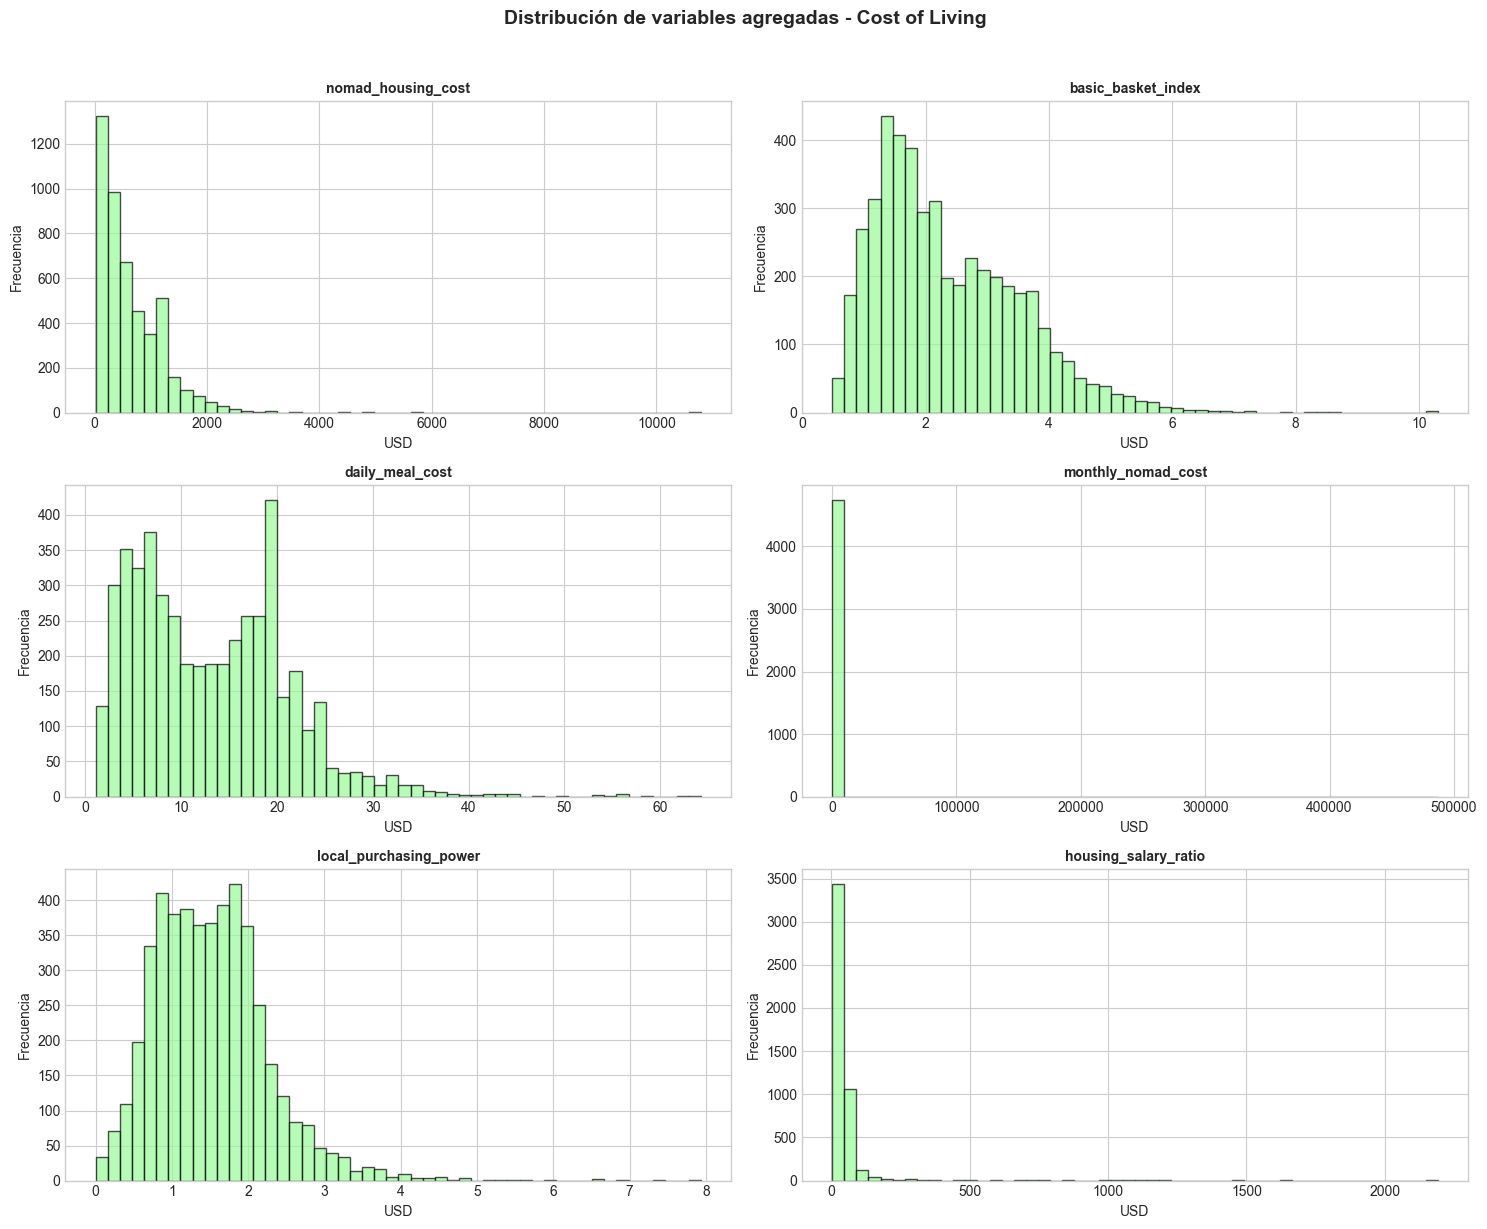

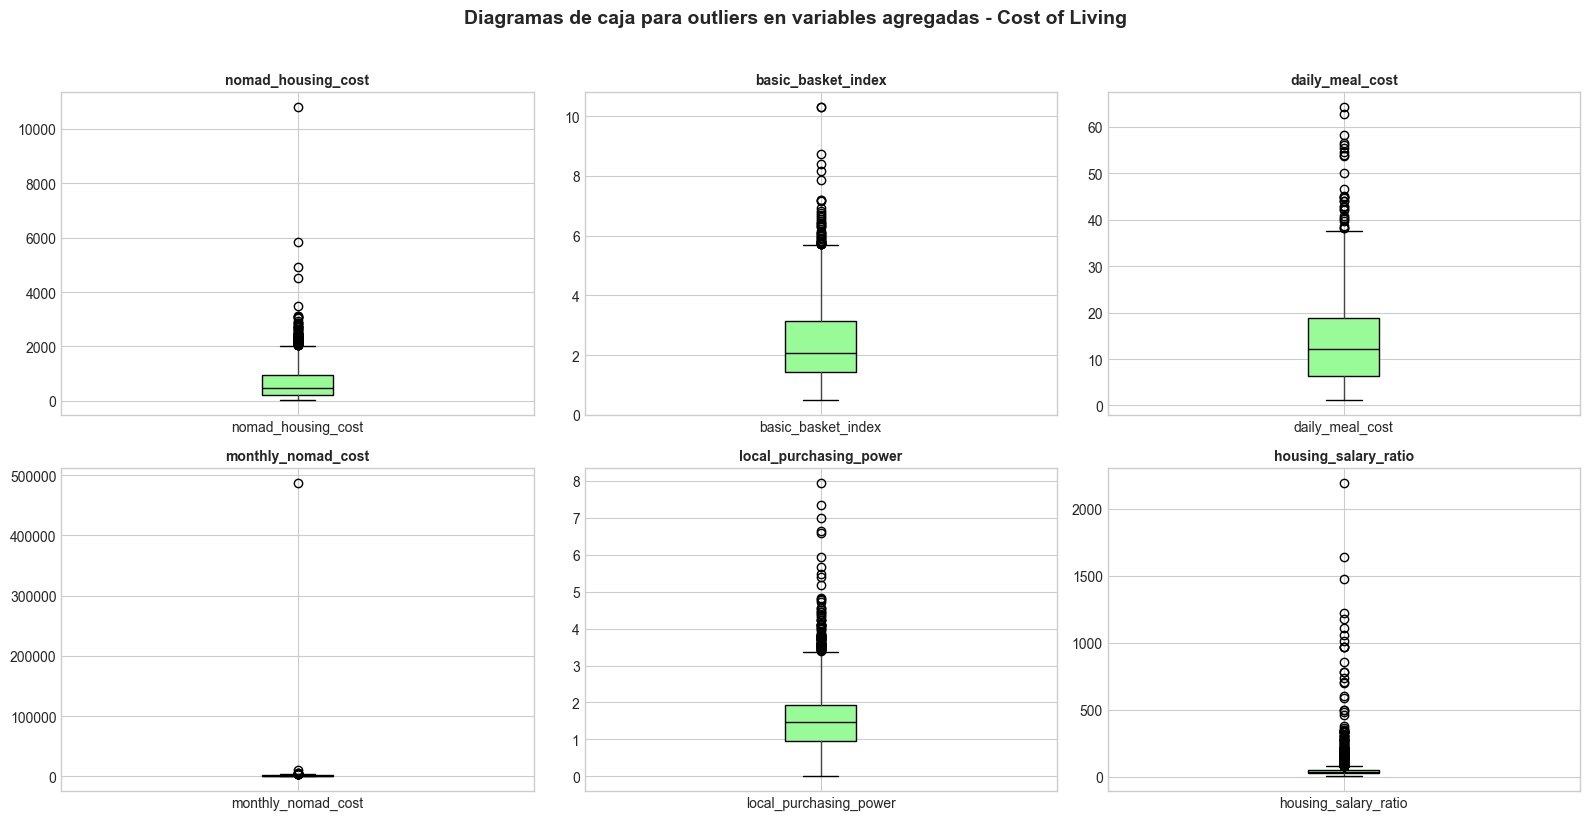

In [108]:
# Visualizaciones: distribuciones con histogramas y outliers con diagramas de caja

# Histogramas para ver la distribución de toda la lista de variables clave 

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

for i, idx in enumerate(added_vars_list):
    ax = axes[i]
    df_cost[idx].hist(bins=50, ax=ax, color='palegreen', edgecolor='black', alpha=0.7)
    ax.set_title(idx, fontsize=10, fontweight='bold')
    ax.set_xlabel('USD')
    ax.set_ylabel('Frecuencia')

plt.suptitle('Distribución de variables agregadas - Cost of Living', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Mostramos los diagramas de caja para ver outliers en las mismas variables 

fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

for i, idx in enumerate(added_vars_list):
    ax = axes[i]
    df_cost.boxplot(column=idx, ax=ax, 
                    patch_artist=True, 
                    boxprops=dict(facecolor='palegreen', color='black'),
                    medianprops=dict(color='black'))
    ax.set_title(idx, fontsize=10, fontweight='bold')

plt.suptitle('Diagramas de caja para outliers en variables agregadas - Cost of Living', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Análisis porcentual de variables agregadas de Cost of Living: 

1. Análisis por percentiles del coste medio mensual en todas las ciudades del dataset.
2. Capacidad de compra por encima de salario medio. 
3. Volumen de inversión del salario medio en vivienda. 

In [88]:
# Análisis de ciudades baratas, moderadas, caras y muy caras en función de los percentiles del gasto mensual

print("Coste mensual de la vida en todas las ciudades del dataset Cost of Living")
print("El análisis establece los cuartiles (25% y 75%), la mediana y el percentil 90")
print("-----------------------------------------------------------------------------")
mnc = df_cost['monthly_nomad_cost']
print(f"Coste mensual barato (percentil 25): {mnc.quantile(0.25):,.0f} dólares")
print(f"Coste mensual moderado (percentil 50): {mnc.quantile(0.50):,.0f} dólares")
print(f"Coste mensual caro (percentil 75): {mnc.quantile(0.75):,.0f} dólares")
print(f"Coste mensual muy caro (percentil 90); {mnc.quantile(0.90):,.0f} dólares")


Coste mensual de la vida en todas las ciudades del dataset Cost of Living
El análisis establece los cuartiles (25% y 75%), la mediana y el percentil 90
-----------------------------------------------------------------------------
Coste mensual barato (percentil 25): 492 dólares
Coste mensual moderado (percentil 50): 968 dólares
Coste mensual caro (percentil 75): 1,643 dólares
Coste mensual muy caro (percentil 90); 2,113 dólares


In [ ]:
# Capacidad de compra mensual: ¿qué % de ciudades tienen salarios promedio por encima del coste mensual?
# La variable estaba calculada sobre df_cost['local_purchasing_power'] = (df_cost['avg_net_salary'] / df_cost['monthly_nomad_cost'])
# Si la variables > 1, el salario promedio es mayor al coste mensual

print("Análisis de capacidad de compra (salario promedio/coste mensual)")
print("----------------------------------------------------------------")
lpp = df_cost['local_purchasing_power']
print(f"Ciudades donde salario > coste nmensual: {(lpp > 1).sum()} ({(lpp > 1).mean()*100:.1f}%)")
print(f"Ciudades donde salario < coste mensual: {(lpp < 1).sum()} ({(lpp < 1).mean()*100:.1f}%)")
print("-----------------------------------------------------------------------------------------------")
print("Los ciudadanos del 73,7% de las ciudades ingresan un salario promedio superior al gasto mensual")
print("Los ciudadanos del 26,3% de las ciudades ingresan un salario promedio inferior al gasto mensual")


Análisis de capacidad de compra (salario promedio/coste mensual)
----------------------------------------------------------------
Ciudades donde salario > coste nmensual: 3494 (73.7%)
Ciudades donde salario < coste mensual: 1248 (26.3%)
-----------------------------------------------------------------------------------------------
Los ciudadanos del 73,7% de las ciudades ingresan un salario promedio superior al gasto mensual
Los ciudadanos del 26,3% de las ciudades ingresan un salario promedio inferior al gasto mensual


In [64]:
# ¿Qué cantidad de salario dedican al gasto en vivienda?
# Las recomendaciones es que la inversión del salario en vivienda debería estar en torno al 30%. 
# Entre el 30-50% el gasto del salario en vivienda sería menos razonable. 
# Un gasto por encimas del 50% indicaría una inversión insostenible en el tiempo. 

print("Análisis del gasto porcentual del salario promedio en vivienda")
print("--------------------------------------------------------------")
hsr = df_cost['housing_salary_ratio']
print(f"Situación óptima (gasto < 30%): {(hsr < 30).sum()} ciudades ({(hsr < 30).mean()*100:.1f}%)")
print(f"Situación mejorables (gasto entre 30-50%): {((hsr >= 30) & (hsr < 50)).sum()} ciudades ({((hsr >= 30) & (hsr < 50)).mean()*100:.1f}%)")
print(f"Situación arriesgada (gastos > 50%): {(hsr >= 50).sum()} ciudades ({(hsr >= 50).mean()*100:.1f}%)")



Análisis del gasto porcentual del salario promedio en vivienda
--------------------------------------------------------------
Situación óptima (gasto < 30%): 1591 ciudades (33.6%)
Situación mejorables (gasto entre 30-50%): 2014 ciudades (42.5%)
Situación arriesgada (gastos > 50%): 1137 ciudades (24.0%)


### **3. Análisis univariante: Nomad Index Circleloop**


In [90]:
# Estadísticos descriptivos de las variables agregadas

print("Valores estadísticos descriptivos de las variables de Nomad Index Cicleloop:")
print("----------------------------------------------------------------------------")
df_circleloop.describe().round(2)

Valores estadísticos descriptivos de las variables de Nomad Index Cicleloop:
----------------------------------------------------------------------------


,rank,broadband_speed_mbps,mobile_speed_mbps,broadband_cost,monthly_rent,happiness_index,migrant_population_pct,remote_jobs_searches,digital_nomad_score
count,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00
mean,43.00,81.16,42.68,47.99,712.93,6.06,11.51,4741.65,49.12
std,24.68,56.41,23.16,27.75,470.69,0.89,15.39,12279.24,10.10
min,1.00,4.97,12.68,8.34,145.08,4.15,0.10,40.00,26.32
25%,22.00,31.89,24.63,31.46,382.59,5.51,1.70,430.00,38.97
50%,43.00,68.90,38.88,45.18,558.09,6.12,5.30,1050.00,52.08
75%,64.00,120.13,53.89,59.72,943.02,6.66,15.40,3490.00,56.57
max,85.00,229.42,129.61,183.17,2452.32,7.81,87.90,83900.00,74.35


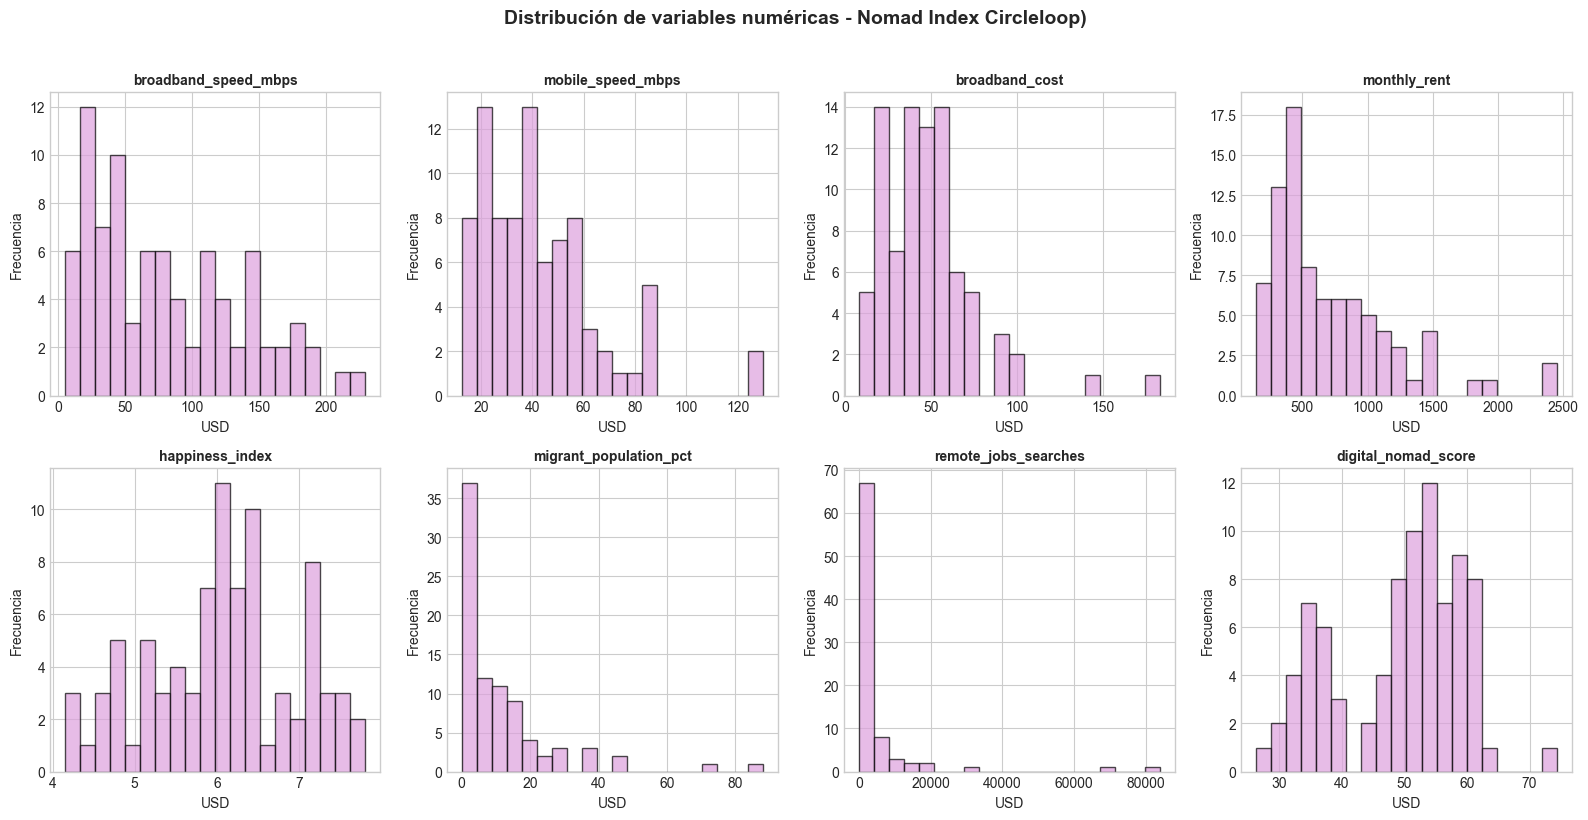

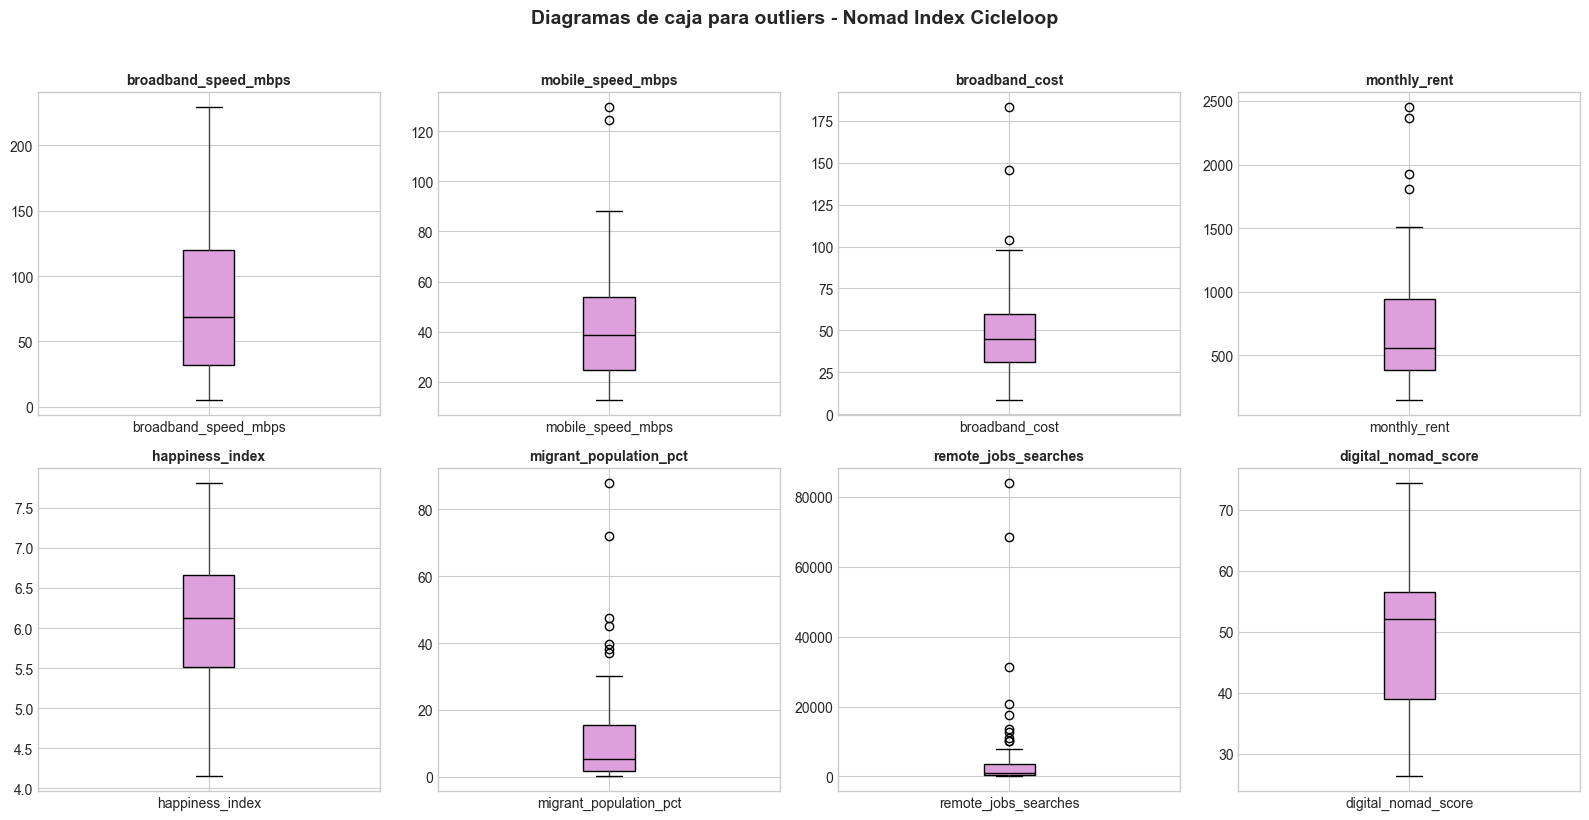

In [104]:
# Creamos una lista de las variables principales del dataset de Nomad Index Circleloop

vars_list_circleloop = [
    'broadband_speed_mbps', 'mobile_speed_mbps', 'broadband_cost',
    'monthly_rent', 
    'happiness_index', 
    'migrant_population_pct',
    'remote_jobs_searches', 
    'digital_nomad_score'
    ]

# Histogramas para ver la distribución de toda la lista de variables clave 

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, var in enumerate(vars_list_circleloop):
    ax = axes[i]
    df_circleloop[var].hist(bins=20, ax=ax, color='plum', edgecolor='black', alpha=0.7)
    ax.set_title(var, fontsize=10, fontweight='bold')
    ax.set_xlabel('USD')
    ax.set_ylabel('Frecuencia')

plt.suptitle('Distribución de variables numéricas - Nomad Index Circleloop)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Mostramos los diagramas de caja para ver outliers en las mismas variables 

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, var in enumerate(vars_list_circleloop):
    ax = axes[i]
    df_circleloop.boxplot(column=var, ax=ax,
                    patch_artist=True, 
                    boxprops=dict(facecolor='plum', color='black'),
                    medianprops=dict(color='black'))
    ax.set_title(var, fontsize=10, fontweight='bold')

plt.suptitle('Diagramas de caja para outliers - Nomad Index Cicleloop', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Análisis de ranking de países en función de la variable `digital_nomad_score`

1. Top 10 países con mejor puntuación en destinos para nómadas digitales. 
2. Top 10 países con peor puntuación en destinos para nómadas digitales. 

In [115]:
print("----------------------------------------------------------------------")
print("Top 10 países con mejor puntuación en destinos para nómadas digitales:")
print("----------------------------------------------------------------------")
print(df_circleloop.nlargest(10, 'digital_nomad_score')[['country', 'digital_nomad_score']])
print("----------------------------------------------------------------------")
print("Top 10 países con peor puntuación en destinos para nómadas digitales:")
print("---------------------------------------------------------------------")
print(df_circleloop.nsmallest(10, 'digital_nomad_score')[['country', 'digital_nomad_score']])

----------------------------------------------------------------------
Top 10 países con mejor puntuación en destinos para nómadas digitales:
----------------------------------------------------------------------
       country  digital_nomad_score
0       Canada                74.35
1           UK                63.43
2      Romania                62.28
3       Sweden                61.54
4      Denmark                61.49
5       France                60.80
6  Netherlands                60.27
7    Australia                60.16
8  Switzerland                60.15
9      Germany                60.00
----------------------------------------------------------------------
Top 10 países con peor puntuación en destinos para nómadas digitales:
---------------------------------------------------------------------
      country  digital_nomad_score
84    Nigeria                26.32
83    Myanmar                29.16
82      Ghana                30.36
81      Kenya                31.27
80  S

### **4. Análisis univariante: Nomad Index Movingto**

In [98]:
# Estadísticos descriptivos de las variables agregadas

print("Valores estadísticos descriptivos de las variables de Nomad Index Movingto:")
print("---------------------------------------------------------------------------")
df_movingto.describe().round(2)

Valores estadísticos descriptivos de las variables de Nomad Index Movingto:
---------------------------------------------------------------------------


,rank,overall_score,internet_speed,cost_of_living,safety,visa_ease,quality_of_life
count,40.00,40.00,40.0,40.00,40.00,40.00,40.00
mean,20.50,72.50,83.8,73.97,84.25,85.05,87.30
std,11.69,11.69,6.6,13.64,8.33,7.09,6.66
min,1.00,53.00,70.0,50.00,65.00,70.00,75.00
25%,10.75,62.75,80.0,60.00,78.75,80.00,80.00
50%,20.50,72.50,85.0,75.50,85.00,85.00,87.00
75%,30.25,82.25,90.0,85.00,90.00,90.00,95.00
max,40.00,92.00,95.0,95.00,95.00,100.00,95.00


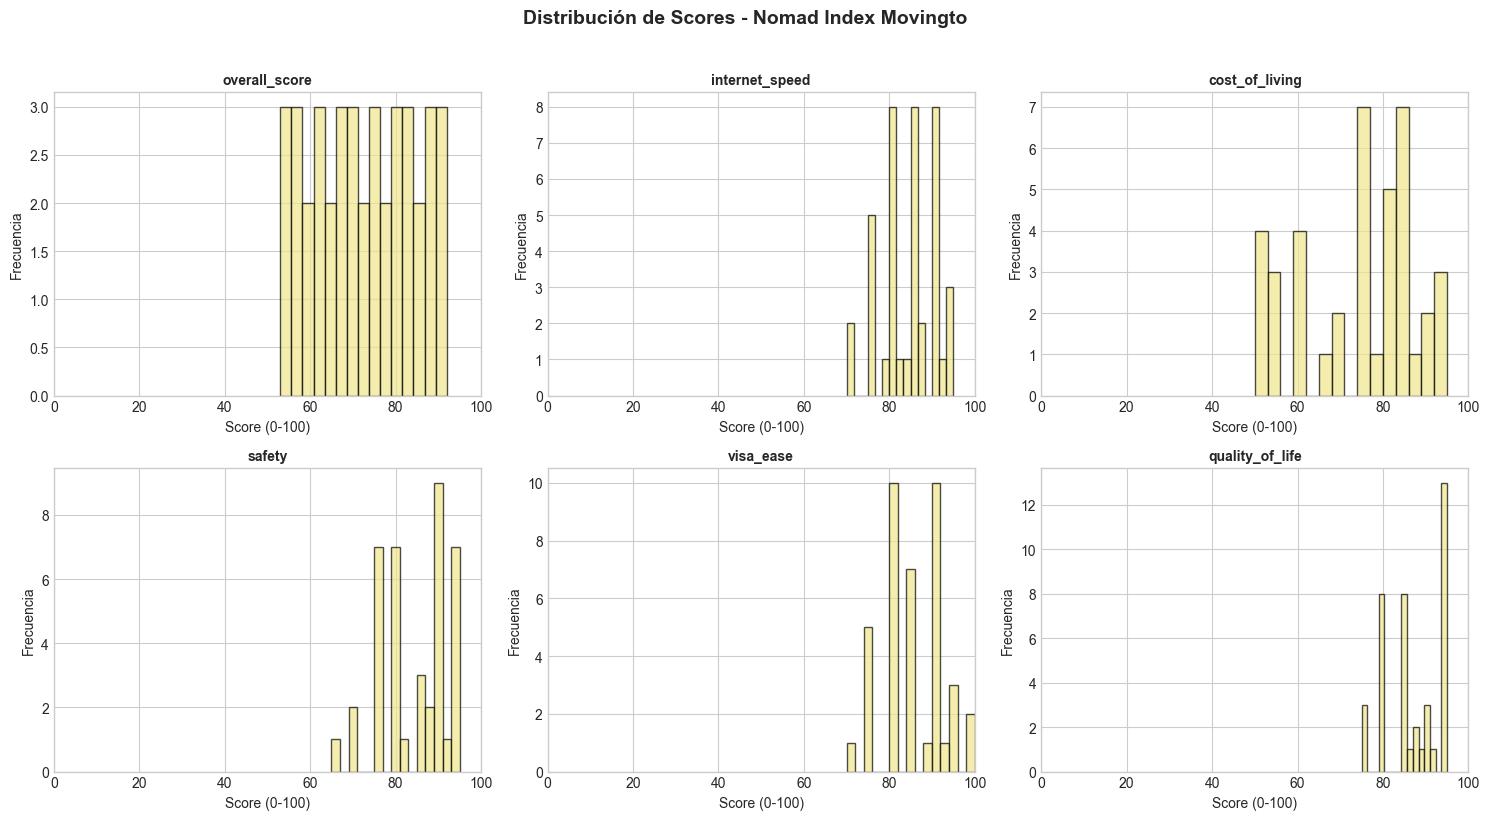

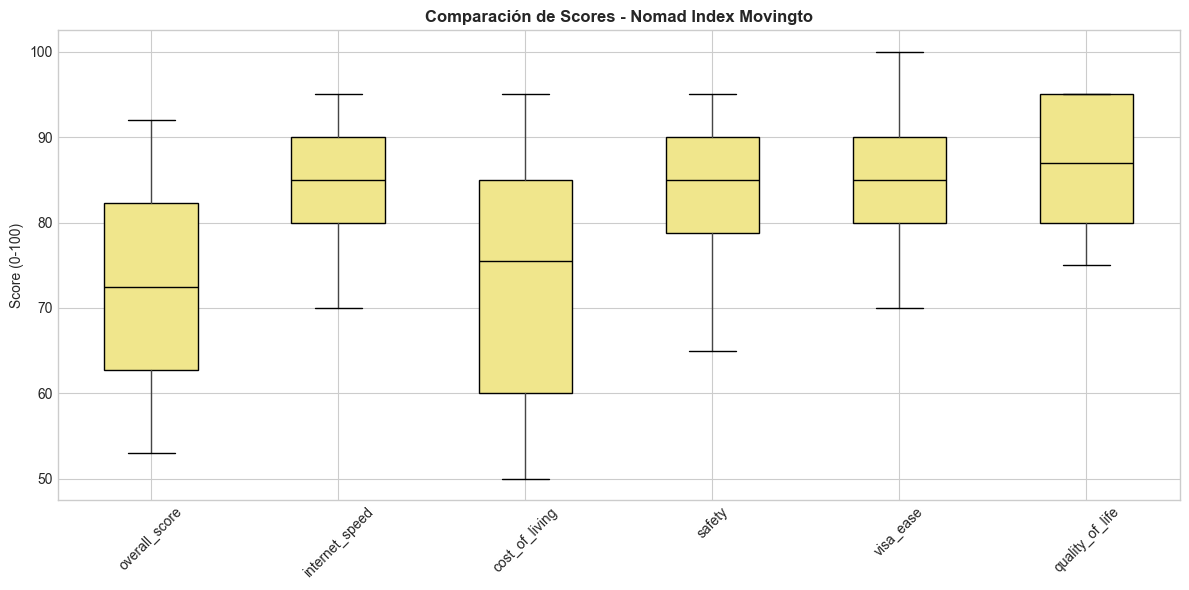

In [101]:
# Creamos una lista de las variables principales del dataset de Nomad Index Movingto

vars_scores = ['overall_score', 
               'internet_speed', 
               'cost_of_living', 
               'safety', 
               'visa_ease', 
               'quality_of_life'
               ]

# Histogramas para ver la distribución de toda la lista de variables clave 

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, var in enumerate(vars_scores):
    ax = axes[i]
    df_movingto[var].hist(bins=15, ax=ax, color='khaki', edgecolor='black', alpha=0.7)
    ax.set_title(var, fontsize=10, fontweight='bold')
    ax.set_xlabel('Score (0-100)')
    ax.set_ylabel('Frecuencia')
    ax.set_xlim(0, 100)

plt.suptitle('Distribución de Scores - Nomad Index Movingto', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Mostramos los diagramas de caja para ver outliers en las mismas variables 

fig, ax = plt.subplots(figsize=(12, 6))
df_movingto[vars_scores].boxplot(ax=ax,
                    patch_artist=True, 
                    boxprops=dict(facecolor='khaki', color='black'),
                    medianprops=dict(color='black'))
ax.set_title('Comparación de Scores - Nomad Index Movingto', fontsize=12, fontweight='bold')
ax.set_ylabel('Score (0-100)')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

Análisis de ranking de países en función de las variables `internet_speed`, `safety` y `visa_ease`

1. Top 10 países con mejor puntuación en destinos para nómadas digitales de las tres variables. 
2. Top 10 países con peor puntuación en destinos para nómadas digitales de las tres variables. 

In [124]:
print("---------------------------------------------------------------------")
print("Top 10 países con mejor velocidad de internet para nómadas digitales:")
print("---------------------------------------------------------------------")
print(df_movingto.nlargest(10, 'internet_speed')[['country', 'internet_speed']])
print("---------------------------------------------------------------------")
print("Top 10 países con peor velocidad de internet para nómadas digitales:")
print("---------------------------------------------------------------------")
print(df_movingto.nsmallest(10, 'internet_speed')[['country', 'internet_speed']])

---------------------------------------------------------------------
Top 10 países con mejor velocidad de internet para nómadas digitales:
---------------------------------------------------------------------
        country  internet_speed
1       Estonia              95
14    Singapore              95
25  South Korea              95
11  Netherlands              92
0      Portugal              90
10      Germany              90
24        Japan              90
26       Taiwan              90
36      Iceland              90
37       Norway              90
---------------------------------------------------------------------
Top 10 países con peor velocidad de internet para nómadas digitales:
---------------------------------------------------------------------
       country  internet_speed
22   Argentina              70
23    Colombia              70
12   Indonesia              75
19     Uruguay              75
20      Panama              75
28    Barbados              75
29  Monteneg

In [123]:
print("--------------------------------------------------------")
print("Top 10 países con mejr seguridad para nómadas digitales:")
print("--------------------------------------------------------")
print(df_movingto.nlargest(10, 'safety')[['country', 'safety']])
print("--------------------------------------------------------")
print("Top 10 países con peor seguridad para nómadas digitales:")
print("--------------------------------------------------------")
print(df_movingto.nsmallest(10, 'safety')[['country', 'safety']])

--------------------------------------------------------
Top 10 países con mejr seguridad para nómadas digitales:
--------------------------------------------------------
        country  safety
0      Portugal      95
14    Singapore      95
24        Japan      95
35  New Zealand      95
36      Iceland      95
37       Norway      95
38      Finland      95
3         Spain      92
1       Estonia      90
10      Germany      90
--------------------------------------------------------
Top 10 países con peor seguridad para nómadas digitales:
--------------------------------------------------------
       country  safety
23    Colombia      65
22   Argentina      70
33      Serbia      70
5       Mexico      75
13     Vietnam      75
20      Panama      75
29  Montenegro      75
30     Hungary      75
31     Romania      75
32    Bulgaria      75


In [122]:
print("-----------------------------------------------------------")
print("Top 10 países por facilidad de visa para nómadas digitales:")
print("-----------------------------------------------------------")
print(df_movingto.nlargest(10, 'visa_ease')[['country', 'visa_ease']])
print("-----------------------------------------------------------")
print("Top 10 países por facilidad de visa para nómadas digitales:")
print("-----------------------------------------------------------")
print(df_movingto.nsmallest(10, 'visa_ease')[['country', 'visa_ease']])

-----------------------------------------------------------
Top 10 países por facilidad de visa para nómadas digitales:
-----------------------------------------------------------
       country  visa_ease
2      Georgia        100
1      Estonia         98
0     Portugal         95
28    Barbados         95
5       Mexico         94
3        Spain         92
4     Thailand         90
7     Malaysia         90
9   Costa Rica         90
16       Malta         90
-----------------------------------------------------------
Top 10 países por facilidad de visa para nómadas digitales:
-----------------------------------------------------------
        country  visa_ease
24        Japan         70
14    Singapore         75
25  South Korea         75
26       Taiwan         75
34    Australia         75
35  New Zealand         75
11  Netherlands         80
13      Vietnam         80
15       Canada         80
30      Hungary         80
